## Install dependencies

In [1]:
!pip install labelme tensorflow opencv-python matplotlib albumentations

  Using cached labelme-5.4.1.tar.gz (1.4 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached albumentations-1.3.1-py3-none-any.whl.metadata (34 kB)
  Using cached imgviz-1.7.5.tar.gz (7.7 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached natsort-8.4.0-py3-none-any.whl.metadata (21 kB)
  Using cached PyQt5-5.15.10-cp37-abi3-win_amd64.whl.metadata (2.2 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/160.8 kB ? eta -:--:--
     ----------------------------- -------- 122.9/160.8 kB 3.6 MB/s eta 0:00:01
     -------------------------------------- 160.8/160.8 kB 3.2 MB/s eta 0:00:00
  Using cached pyparsing-3.1.1-py3-none-any.whl.metadata (5.1 kB)
  Using cached importlib_resources-6.1.1-py3-none-any.whl.met

## Collect Images using OpenCV

#### We want 300 samples total, 210 for training, 45 for evaluation, 45 for test

In [4]:
import os
import time
import uuid
import cv2

#### Let's get the training images for when engaged and label them

In [321]:
IMAGES_PATH = os.path.join(os.getcwd(), 'data','train','images', 'engaged')
number_images = 105

In [322]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [8]:
!labelme

2024-02-03 19:22:24,810 [INFO   ] __init__:get_config:67- Loading config file from: C:\Users\reddy\.labelmerc


#### Let's get the training images for when disengaged and label them

In [324]:
IMAGES_PATH = os.path.join(os.getcwd(), 'data','train','images', 'disengaged')
number_images = 105

In [325]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [326]:
!labelme

[INFO   ] __init__:get_config:70 - Loading config file from: C:\Users\reddy\.labelmerc


#### Let's get the test images for when engaged and label them

In [327]:
IMAGES_PATH = os.path.join(os.getcwd(), 'data','test','images', 'engaged')
number_images = 23

In [328]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [329]:
!labelme

[INFO   ] __init__:get_config:70 - Loading config file from: C:\Users\reddy\.labelmerc


#### Let's get the test images for when disengaged and label them

In [330]:
IMAGES_PATH = os.path.join(os.getcwd(), 'data','test','images', 'disengaged')
number_images = 22

In [331]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [332]:
!labelme

[INFO   ] __init__:get_config:70 - Loading config file from: C:\Users\reddy\.labelmerc


#### Let's get the evaluation images for when engaged and label them

In [333]:
IMAGES_PATH = os.path.join(os.getcwd(), 'data','val','images', 'engaged')
number_images = 23

In [334]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [335]:
!labelme

[INFO   ] __init__:get_config:70 - Loading config file from: C:\Users\reddy\.labelmerc


#### Let's get the evaluation images for when disengaged and label them

In [336]:
IMAGES_PATH = os.path.join(os.getcwd(), 'data','val','images', 'disengaged')
number_images = 22

In [337]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [338]:
!labelme

[INFO   ] __init__:get_config:70 - Loading config file from: C:\Users\reddy\.labelmerc


## Add additional images for extra data

## Review Dataset and Build Image Loading Function

In [6]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

#### Limit GPU memory growth

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

#### Load images into TF data pipeline

In [14]:
images = tf.data.Dataset.list_files('data\\train\\images\\engaged\\*.jpg')

In [15]:
images.as_numpy_iterator().next()

b'data\\train\\images\\engaged\\68f7b1f5-afd1-11ee-b9fc-bcf1717cb351.jpg'

In [7]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [17]:
images = images.map(load_image)

In [18]:
images.as_numpy_iterator().next()

array([[[ 74,  80,  80],
        [ 74,  80,  80],
        [ 74,  80,  80],
        ...,
        [251, 251, 249],
        [251, 251, 253],
        [251, 251, 253]],

       [[ 71,  77,  77],
        [ 71,  77,  77],
        [ 72,  78,  78],
        ...,
        [251, 251, 249],
        [251, 251, 253],
        [251, 251, 253]],

       [[ 74,  78,  79],
        [ 74,  78,  79],
        [ 73,  79,  79],
        ...,
        [251, 251, 249],
        [251, 251, 253],
        [251, 251, 253]],

       ...,

       [[ 86,  99, 116],
        [ 93, 109, 125],
        [ 95, 111, 127],
        ...,
        [235, 250, 255],
        [246, 255, 255],
        [245, 255, 255]],

       [[103, 118, 137],
        [108, 125, 143],
        [102, 119, 137],
        ...,
        [247, 255, 255],
        [251, 255, 255],
        [250, 255, 251]],

       [[103, 120, 138],
        [106, 123, 141],
        [102, 119, 137],
        ...,
        [247, 255, 255],
        [252, 254, 251],
        [255, 255, 251]]

In [12]:
type(images)

tensorflow.python.data.ops.dataset_ops.MapDataset

#### Review the images with MatPlotLib

In [13]:
image_generator = images.batch(4).as_numpy_iterator()

In [14]:
plot_images = image_generator.next()

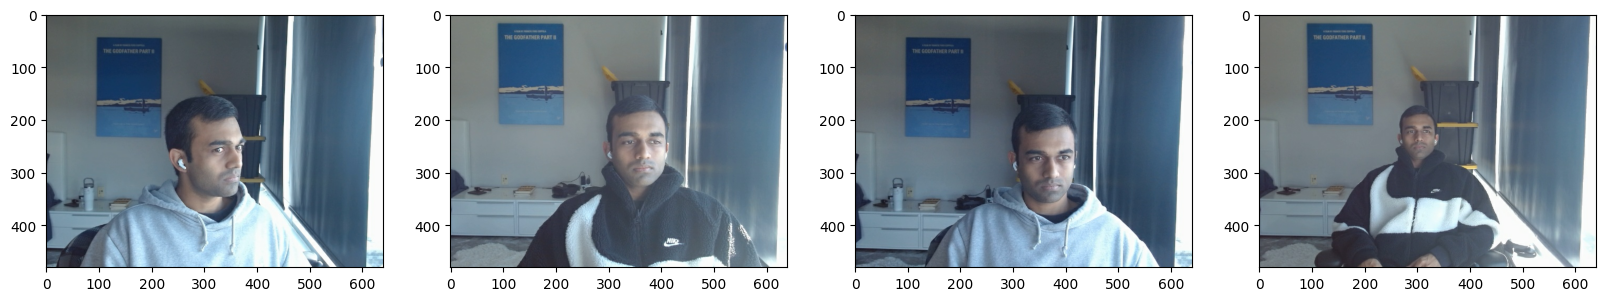

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

## Apply Image Augmentation on Images and Labels using Albumentations

In [16]:
import albumentations as alb

In [17]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['is_face', 'is_engaged']))

#### Load a test image and label with OpenCV and JSON

In [18]:
img = cv2.imread(os.path.join('data','train','images','engaged','2a2fbd94-a99d-11ee-af6e-bcf1717cb351.jpg'))

In [19]:
with open(os.path.join('data','train','labels','engaged','2a2fbd94-a99d-11ee-af6e-bcf1717cb351.json'), 'r') as f:
    label = json.load(f)

In [20]:
label['shapes'][0]['points']

[[313.4375, 212.5], [408.4375, 320.625]]

#### Extract coorginates and rescale to match image resolution

In [21]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [22]:
coords

[313.4375, 212.5, 408.4375, 320.625]

In [23]:
coords = list(np.divide(coords, [640,480,640,480]))

In [24]:
coords

[0.48974609375, 0.4427083333333333, 0.63818359375, 0.66796875]

In [25]:
if (label['shapes'][0]['label'] == 'engaged'):
    is_engaged = 1
else:
    is_engaged = 0
is_face = 1

#### Apply augmentations and view results

In [26]:
augmented = augmentor(image=img, bboxes=[coords], is_face=[is_face], is_engaged=[is_engaged])

In [27]:
augmented['bboxes'][0][2:]

(0.5545833333333333, 0.5900000000000001)

In [28]:
augmented['bboxes']

[(0.3434722222222222,
  0.34972222222222227,
  0.5545833333333333,
  0.5900000000000001)]

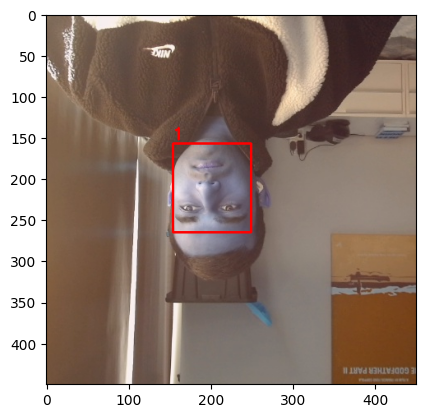

In [29]:
topLeft = tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int))
bottomRight = tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int))

topLeftOffset = (topLeft[0], topLeft[1] - 5)

cv2.rectangle(
    augmented['image'], 
    topLeft,
    bottomRight, 
    (255,0,0), 
    2
)

cv2.putText(
    augmented['image'], 
    str(is_engaged), 
    topLeftOffset,
    cv2.FONT_HERSHEY_SIMPLEX,
    0.65,
    (255,0,0), 
    2
)

plt.imshow(augmented['image'])

## Build and run the augmentation pipeline

#### Run augmentation pipeline

In [339]:
for partition in ['train','test','val']: 
    for image_type in ['engaged', 'disengaged']:
        for image in os.listdir(os.path.join('data', partition, 'images', image_type)):
            img = cv2.imread(os.path.join('data', partition, 'images', image_type, image))

            coords = [0,0,0.00001,0.00001]
            label_path = os.path.join('data', partition, 'labels', image_type, f'{image.split(".")[0]}.json')
            if os.path.exists(label_path):
                with open(label_path, 'r') as f:
                    label = json.load(f)

                coords[0] = label['shapes'][0]['points'][0][0]
                coords[1] = label['shapes'][0]['points'][0][1]
                coords[2] = label['shapes'][0]['points'][1][0]
                coords[3] = label['shapes'][0]['points'][1][1]
                
                if (label['shapes'][0]['label'] == 'engaged'):
                    is_engaged = 1
                else:
                    is_engaged = 0
                    
                coords = list(np.divide(coords, [640,480,640,480]))

            try: 
                for x in range(60):
                    augmented = augmentor(image=img, bboxes=[coords], is_face=[is_face], is_engaged=[is_engaged])
                    cv2.imwrite(os.path.join('aug_data', 'images', partition, f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                    annotation = {}
                    annotation['image'] = image

                    if os.path.exists(label_path):
                        if len(augmented['bboxes']) == 0: 
                            annotation['bbox'] = [0,0,0,0]
                            annotation['is_face'] = 0
                            annotation['is_engaged'] = 0
                        else: 
                            annotation['bbox'] = augmented['bboxes'][0]
                            annotation['is_face'] = 1
                            annotation['is_engaged'] = is_engaged
                    else: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['is_face'] = 0
                        annotation['is_engaged'] = 0


                    with open(os.path.join('aug_data', 'labels', 'vgg', partition, f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                        json.dump(annotation, f)

            except Exception as e:
                print(e)

#### Load augmented data into TensorFlow dataset

In [8]:
train_images = tf.data.Dataset.list_files('aug_data\\images\\train\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [9]:
test_images = tf.data.Dataset.list_files('aug_data\\images\\test\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [10]:
val_images = tf.data.Dataset.list_files('aug_data\\images\\val\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [11]:
train_images.as_numpy_iterator().next()

array([[[0.89509803, 0.91862744, 0.91862744],
        [0.8297794 , 0.8985294 , 0.8943015 ],
        [0.7867647 , 0.8886642 , 0.9030637 ],
        ...,
        [0.2735294 , 0.3529412 , 0.4245098 ],
        [0.26697305, 0.3463848 , 0.41795343],
        [0.28204656, 0.35410538, 0.428125  ]],

       [[0.88756126, 0.91568625, 0.9145833 ],
        [0.7882353 , 0.8778799 , 0.87107843],
        [0.763174  , 0.8813113 , 0.88958335],
        ...,
        [0.18443628, 0.22604166, 0.2956495 ],
        [0.19362745, 0.23523284, 0.30484068],
        [0.21495098, 0.25741422, 0.32506126]],

       [[0.8802083 , 0.91746324, 0.9223652 ],
        [0.78541666, 0.88976717, 0.8871936 ],
        [0.779902  , 0.90294117, 0.9142157 ],
        ...,
        [0.15153186, 0.17015931, 0.24368873],
        [0.1481005 , 0.16672795, 0.24025735],
        [0.1473652 , 0.16170344, 0.23523284]],

       ...,

       [[0.924326  , 0.9351103 , 0.92922795],
        [0.26004902, 0.29534313, 0.32377452],
        [0.225     , 0

## Prepare labels

#### Build label loading function

In [12]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return label['is_face'], label['is_engaged'], label['bbox']

#### Load labels into tensorflow dataset

In [13]:
train_labels = tf.data.Dataset.list_files('aug_data\\labels\\vgg\\train\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.uint8, tf.float16]))

In [14]:
test_labels = tf.data.Dataset.list_files('aug_data\\labels\\vgg\\test\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.uint8, tf.float16]))

In [15]:
val_labels = tf.data.Dataset.list_files('aug_data\\labels\\vgg\\val\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.uint8, tf.float16]))

In [16]:
train_labels.as_numpy_iterator().next()

(1, 0, array([0.10266, 0.172  , 0.3152 , 0.3608 ], dtype=float16))

## Combine images and label samples

In [17]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(25200, 25200, 5400, 5400, 5400, 5400)

#### Create final datasets (images/labels)

In [18]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [19]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [20]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [21]:
train.as_numpy_iterator().next()[1]

(array([1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8),
 array([0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8),
 array([[0.2229, 0.5923, 0.3752, 0.764 ],
        [0.3457, 0.4878, 0.4905, 0.7134],
        [0.5938, 0.2139, 0.7505, 0.4243],
        [0.544 , 0.1448, 0.715 , 0.3435],
        [0.454 , 0.1578, 0.6357, 0.3542],
        [0.3616, 0.5723, 0.509 , 0.7417],
        [0.1787, 0.6143, 0.3677, 0.827 ],
        [0.3738, 0.1859, 0.5425, 0.3855]], dtype=float16))

#### View images and annotations

In [22]:
data_samples = train.as_numpy_iterator()

In [23]:
res = data_samples.next()
res[1][2][0][:2]

array([0.1602, 0.5874], dtype=float16)

error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'rectangle'
> Overload resolution failed:
>  - img marked as output argument, but provided NumPy array marked as readonly
>  - Expected Ptr<cv::UMat> for argument 'img'
>  - img marked as output argument, but provided NumPy array marked as readonly
>  - Expected Ptr<cv::UMat> for argument 'img'


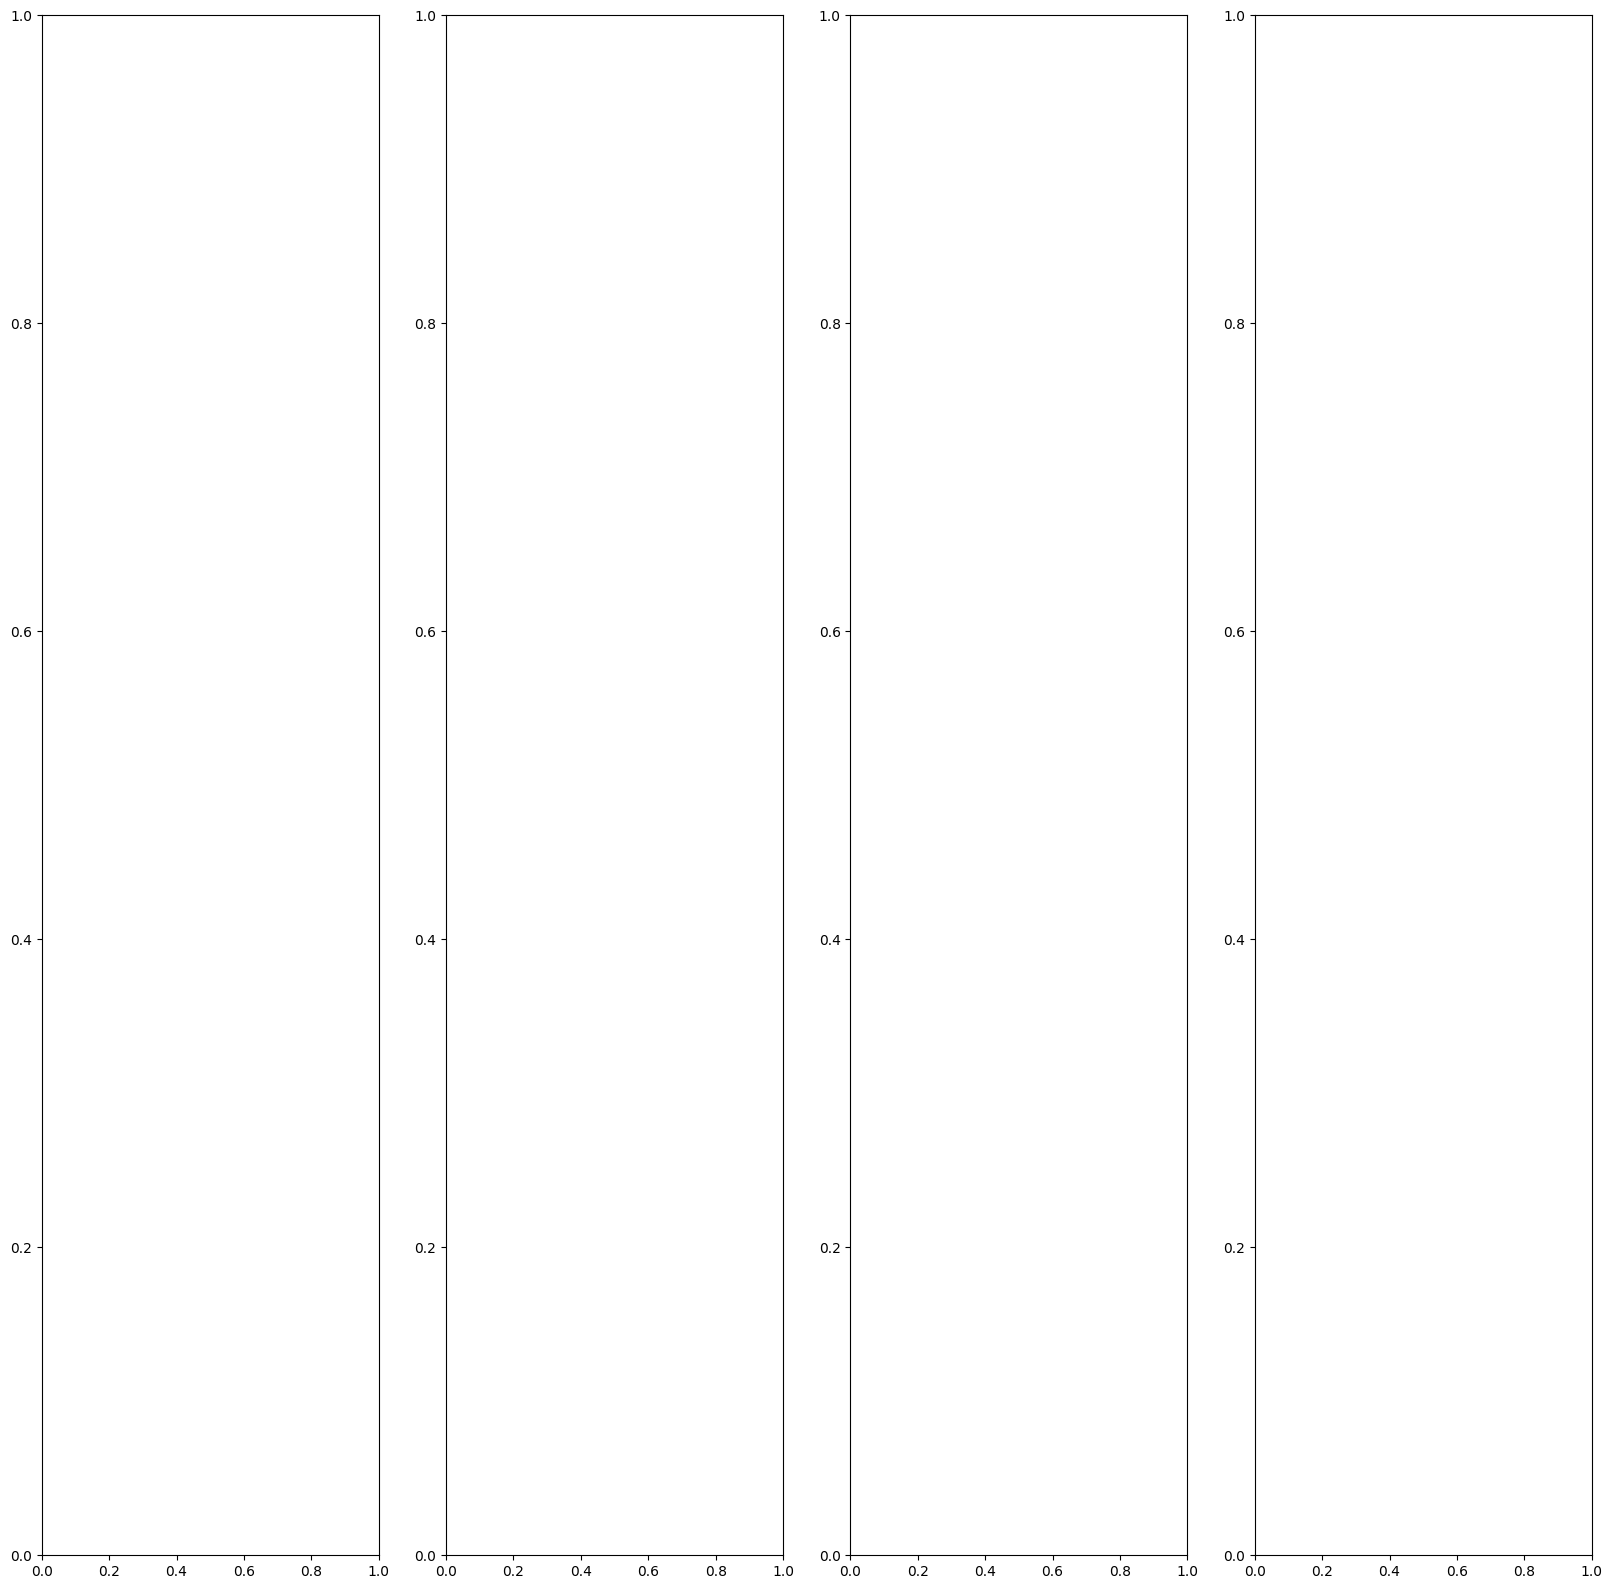

In [24]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(0, 4): 
    sample_image = res[0][idx]
    is_face_label = res[1][0][idx]
    is_engaged_label = res[1][1][idx]
    sample_coords = res[1][2][idx]
    
    topLeft = tuple(np.multiply(sample_coords[:2], [120,120]).astype(int))
    bottomRight = tuple(np.multiply(sample_coords[2:], [120,120]).astype(int))

    topLeftOffset = (topLeft[0], topLeft[1] - 5)
    
    cv2.rectangle(
        sample_image, 
        topLeft,
        bottomRight, 
        (255,0,0), 
        2
    )

    cv2.putText(
        sample_image, 
        str(is_engaged_label), 
        topLeftOffset,
        cv2.FONT_HERSHEY_SIMPLEX,
        0.4,
        (255,0,0), 
        2
    )
    
    ax[idx].imshow(sample_image)

## Build Deep Learning using Functional API

#### Import layers and base networks

In [25]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

#### Import VGG

In [26]:
vgg = VGG16(include_top=False)

In [27]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

#### Build instance of the network

In [28]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification (is a face) Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    isFace = Dense(1, activation='sigmoid')(class1)
    
    # Classification (is engaged) Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    isEngaged = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    engagementTracker = Model(inputs=input_layer, outputs=[isFace, isEngaged, regress2])
    return engagementTracker

#### Test the untrained network

In [29]:
engagementTracker = build_model()

In [30]:
engagementTracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_2[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

In [31]:
X, y = train.as_numpy_iterator().next()

In [32]:
X.shape

(8, 120, 120, 3)

In [33]:
isFace, isEngaged, coords = engagementTracker.predict(X)

1/1 [==============================] - 5s 5s/step


In [34]:
isFace, isEngaged, coords

(array([[0.5307726 ],
        [0.4892892 ],
        [0.490075  ],
        [0.547431  ],
        [0.45234603],
        [0.5698866 ],
        [0.477658  ],
        [0.5601199 ]], dtype=float32),
 array([[0.42685312],
        [0.28529638],
        [0.3462689 ],
        [0.37301397],
        [0.39948118],
        [0.37829617],
        [0.2962531 ],
        [0.4136047 ]], dtype=float32),
 array([[0.4053329 , 0.6673481 , 0.584597  , 0.66796154],
        [0.2848613 , 0.69989413, 0.5000272 , 0.69622934],
        [0.30434516, 0.6941536 , 0.54228455, 0.68762213],
        [0.56391335, 0.71724015, 0.57378876, 0.6340871 ],
        [0.29288512, 0.7193922 , 0.49145487, 0.6983757 ],
        [0.30163917, 0.658867  , 0.57959527, 0.618281  ],
        [0.31185853, 0.6860753 , 0.58317244, 0.7265875 ],
        [0.41685605, 0.6814979 , 0.57414234, 0.6349413 ]], dtype=float32))

## Define Losses and Optimizers

#### Define optimizers and LR

In [35]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [36]:
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=lr_decay)

#### Create localization loss and classification loss

In [37]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [38]:
faceloss = tf.keras.losses.BinaryCrossentropy()
engagementloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

#### Test out loss metrics

In [39]:
localization_loss(y[2], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=1.6507573>

In [40]:
faceloss(y[0], isFace)

<tf.Tensor: shape=(), dtype=float32, numpy=0.66725343>

In [41]:
engagementloss(y[1], isEngaged)

<tf.Tensor: shape=(), dtype=float32, numpy=0.45684248>

## Train neural network

#### Create custom model class

In [42]:
class EngagementTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, faceloss, engagementloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.floss = faceloss
        self.eloss = engagementloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            isFace, isEngaged, coords = self.model(X, training=True)
            
            batch_faceloss = self.floss(y[0], isFace)
            batch_engagementloss = self.eloss(y[1], isEngaged)
            batch_localizationloss = self.lloss(tf.cast(y[2], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_faceloss+batch_engagementloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "face_loss":batch_faceloss, "engagement_loss":batch_engagementloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        isFace, isEngaged, coords = self.model(X, training=False)
        
        batch_faceloss = self.floss(y[0], isFace)
        batch_engagementloss = self.eloss(y[1], isEngaged)
        batch_localizationloss = self.lloss(tf.cast(y[2], tf.float32), coords)
        
        total_loss = batch_localizationloss+0.5*batch_faceloss+batch_engagementloss
        
        return {"total_loss":total_loss, "face_loss":batch_faceloss, "engagement_loss":batch_engagementloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [43]:
model = EngagementTracker(engagementTracker)

In [44]:
model.compile(opt, faceloss, engagementloss, regressloss)

#### Train

In [45]:
logdir='logs'

In [46]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

# checkpoint_path = "checkpoints\\cp-{epoch:04d}.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)

# cp_callback = tf.keras.callbacks.ModelCheckpoint(
#     checkpoint_path, 
#     verbose=1, 
#     save_weight_only=True, 
#     period=1
# )

In [47]:
hist = model.fit(train, epochs=100, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/50
3150/3150 [==============================] - 222s 68ms/step - total_loss: 0.1337 - face_loss: 0.0171 - engagement_loss: 0.0595 - regress_loss: 0.0658 - val_total_loss: 1.0511 - val_face_loss: 4.3175e-04 - val_engagement_loss: 1.0209 - val_regress_loss: 0.0300
Epoch 2/50
3150/3150 [==============================] - 131s 40ms/step - total_loss: 0.0502 - face_loss: 0.0063 - engagement_loss: 0.0236 - regress_loss: 0.0234 - val_total_loss: 2.4665 - val_face_loss: 3.2405e-04 - val_engagement_loss: 2.4285 - val_regress_loss: 0.0378
Epoch 3/50
3150/3150 [==============================] - 131s 40ms/step - total_loss: 0.0308 - face_loss: 0.0051 - engagement_loss: 0.0121 - regress_loss: 0.0162 - val_total_loss: 1.6297 - val_face_loss: 6.3954e-05 - val_engagement_loss: 1.5857 - val_regress_loss: 0.0440
Epoch 4/50
3150/3150 [==============================] - 132s 40ms/step - total_loss: 0.0251 - face_loss: 0.0042 - engagement_loss: 0.0103 - regress_loss: 0.0127 - val_total_loss: 2.4373 -

#### Plot performance

In [81]:
hist.history

{'total_loss': [0.007996483705937862,
  0.0018586755031719804,
  0.0012256145710125566,
  0.0020314170978963375,
  0.002039925893768668,
  0.0025225847493857145,
  0.10194551944732666,
  0.0006875550025142729,
  0.0011606401531025767,
  0.0023788916878402233,
  0.00037761733983643353,
  0.0009085928904823959,
  0.0007066115504130721,
  0.0009306173888035119,
  0.0007591273752041161,
  0.000621988729108125,
  0.001142411958426237,
  0.0005358316702768207,
  0.0007618082454428077,
  0.0006575464503839612],
 'face_loss': [1.1504225767566822e-05,
  1.6391282997574308e-07,
  4.157487182965269e-06,
  9.969253369490616e-06,
  2.980232594040899e-08,
  2.1608533643302508e-05,
  0.11518512666225433,
  1.4901162970204496e-08,
  0.000217141947359778,
  0.0004058376362081617,
  -0.0,
  -0.0,
  2.980232594040899e-08,
  -0.0,
  4.626896043191664e-06,
  -0.0,
  7.450590828739223e-07,
  1.937152518394214e-07,
  -0.0,
  -0.0],
 'engagement_loss': [3.132355777779594e-05,
  3.0995965062174946e-05,
  1.936

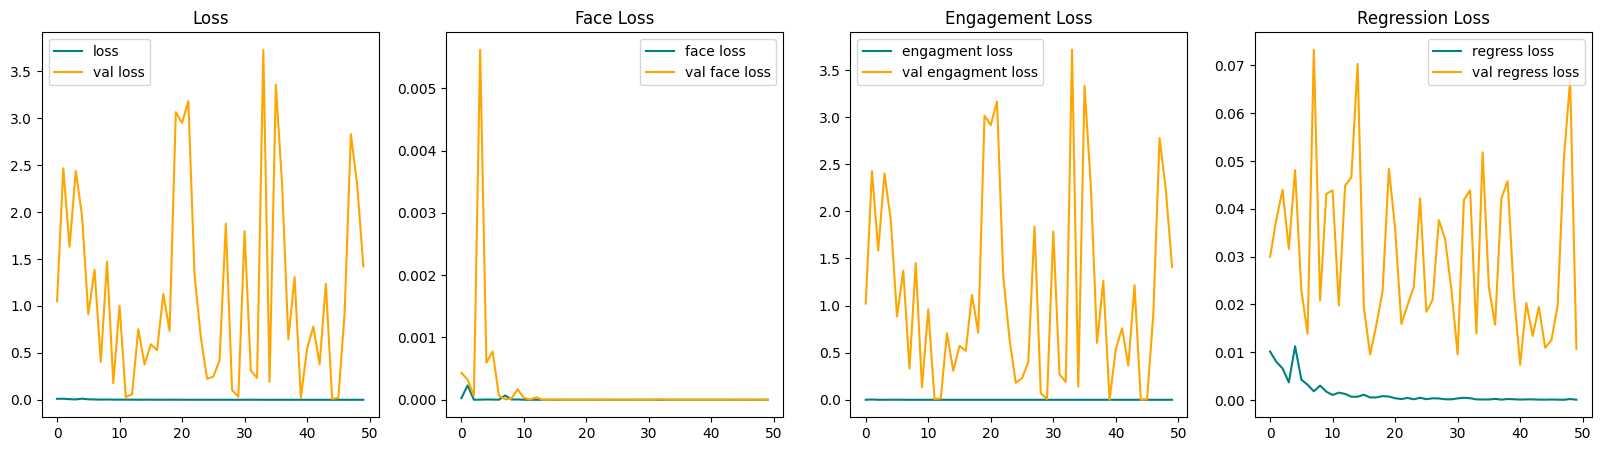

In [48]:
fig, ax = plt.subplots(ncols=4, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['face_loss'], color='teal', label='face loss')
ax[1].plot(hist.history['val_face_loss'], color='orange', label='val face loss')
ax[1].title.set_text('Face Loss')
ax[1].legend()

ax[2].plot(hist.history['engagement_loss'], color='teal', label='engagment loss')
ax[2].plot(hist.history['val_engagement_loss'], color='orange', label='val engagment loss')
ax[2].title.set_text('Engagement Loss')
ax[2].legend()

ax[3].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[3].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[3].title.set_text('Regression Loss')
ax[3].legend()

plt.show()

## Make predictions

#### Make predictions on the test set

In [89]:
test_data = test.as_numpy_iterator()

In [90]:
test_sample = test_data.next()

In [91]:
yhat = engagementTracker.predict(test_sample[0])

1/1 [==============================] - 0s 141ms/step


In [92]:
yhat

[array([[0.9999989],
        [1.       ],
        [1.       ],
        [0.9999981],
        [1.       ],
        [1.       ],
        [0.9999999],
        [1.       ]], dtype=float32),
 array([[6.0932031e-03],
        [1.0000000e+00],
        [4.8033545e-08],
        [9.7805780e-01],
        [1.0000000e+00],
        [8.3190706e-03],
        [9.9999893e-01],
        [1.0000000e+00]], dtype=float32),
 array([[0.01765271, 0.30962002, 0.14267872, 0.54401207],
        [0.5019987 , 0.43342796, 0.6733712 , 0.63994026],
        [0.52412957, 0.25307462, 0.7374957 , 0.4274029 ],
        [0.30371317, 0.2989176 , 0.4516881 , 0.5034379 ],
        [0.58157223, 0.36667028, 0.755745  , 0.57234156],
        [0.8784912 , 0.5083013 , 0.9941888 , 0.741244  ],
        [0.4957485 , 0.3373452 , 0.6668719 , 0.5313344 ],
        [0.25165114, 0.45780548, 0.38834476, 0.6694094 ]], dtype=float32)]

error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'rectangle'
> Overload resolution failed:
>  - img marked as output argument, but provided NumPy array marked as readonly
>  - Expected Ptr<cv::UMat> for argument 'img'
>  - img marked as output argument, but provided NumPy array marked as readonly
>  - Expected Ptr<cv::UMat> for argument 'img'


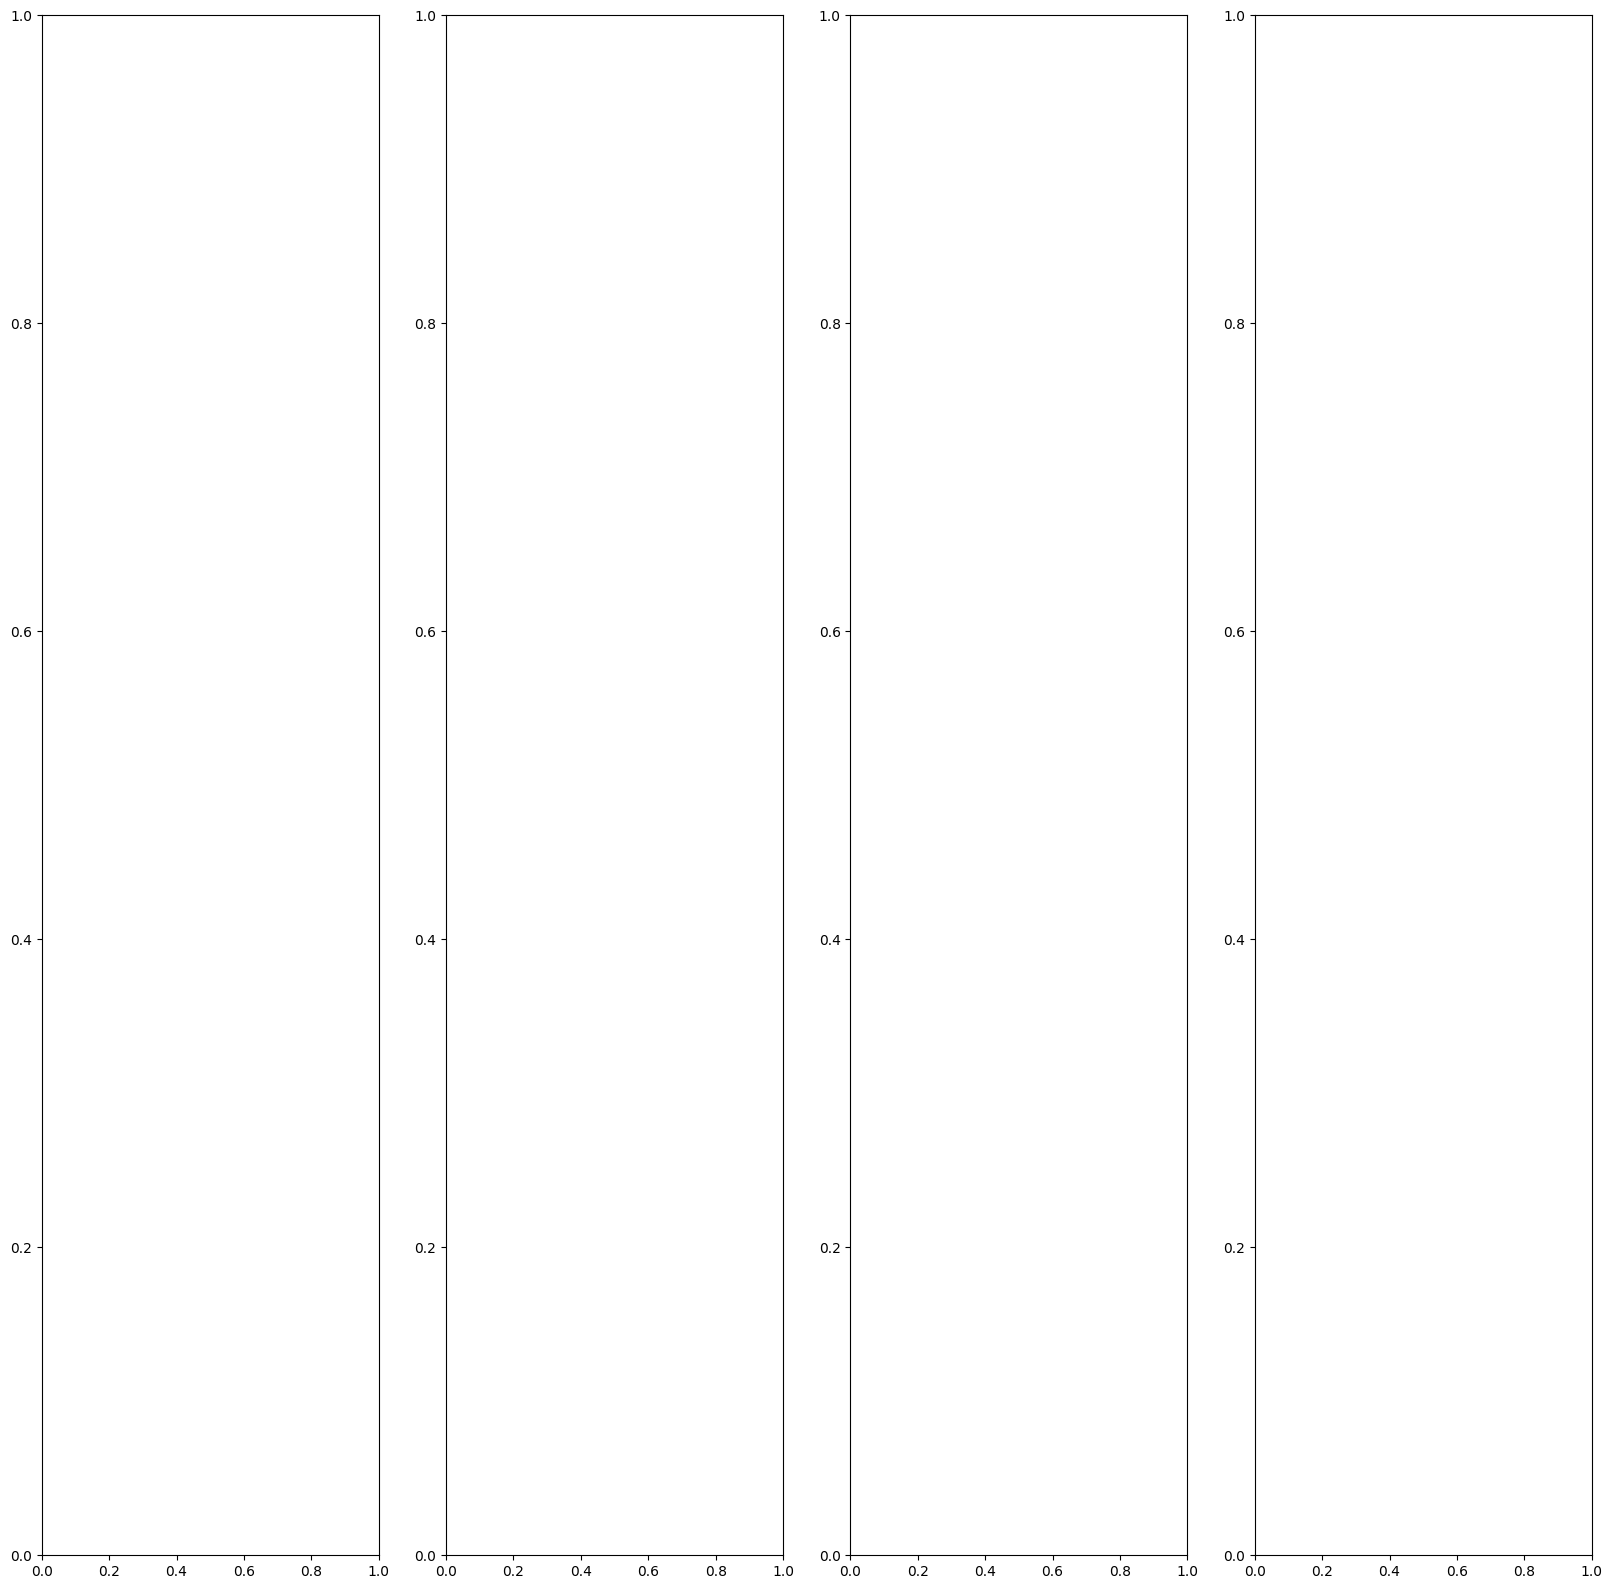

In [88]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    is_face = yhat[0][idx]
    is_engaged = yhat[1][idx]
    sample_coords = yhat[2][idx]
    
    if is_face > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
        
        engaged = 0
        if is_engaged > 0.9:
            engaged = 1
        
        cv2.putText(
            sample_image, 
            str(engaged), 
            tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.4,
            (255,0,0), 
            2
        )
    
    ax[idx].imshow(sample_image)

## Save the model

In [1]:
from tensorflow.keras.models import load_model

In [2]:
# engagementTracker.save('ssd_50.h5')
engagementTracker = load_model('ssd_50.h5')
# engagementTracker.save('saved_model/my_model')
# engagementTracker = load_model("runs/detect/train23/weights/best_saved_model")
# engagementTracker.summary()

## Real time detection

In [7]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    
    frame = frame[50:500, 50:500,:]

    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))

    yhat = engagementTracker.predict(np.expand_dims(resized/255,0))
    is_face = yhat[0]
    is_engaged = yhat[1]
    sample_coords = yhat[2][0]

    if is_face > 0.7: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)

        engaged = 0
        if is_engaged > 0.5:
            engaged = 1

        cv2.putText(
            frame, 
            str(engaged), 
            tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
            cv2.FONT_HERSHEY_SIMPLEX,
            1,
            (255,255,255), 
            2
        )

    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 22ms/step


## YOLOv8 Implementation

#### Convert existing augmented labels (JSON) to YOLO format

In [375]:
for partition in ['train','test','val']: 
    for label_file in os.listdir(os.path.join('aug_data', 'labels', 'vgg', partition)):
        coords = [0,0,0,0]
        label_path = os.path.join('aug_data', 'labels', 'vgg', partition, f'{label_file}')

        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)
            
            is_face = label['is_face']
            is_engaged = label['is_engaged']
            
            x_center = (label['bbox'][0] + label['bbox'][2]) / 2
            y_center = (label['bbox'][1] + label['bbox'][3]) / 2
            label_width = abs(label['bbox'][2] - label['bbox'][0])
            label_height = abs(label['bbox'][3] - label['bbox'][1])
            
        try: 
            if os.path.exists(label_path) and is_face:
                yolo_format = f"{is_engaged} {x_center} {y_center} {label_width} {label_height}"

                with open(os.path.join('aug_data', 'labels', partition, f'{label_file.split(".")[0]}.{label_path.split(".")[1]}.txt'), 'w') as f:
                    f.write(yolo_format)

        except Exception as e:
            print(e)

#### Import YOLO

In [56]:
!pip install -U ultralytics

     ---------------------------------------- 0.0/40.2 kB ? eta -:--:--
     ------------------- ------------------ 20.5/40.2 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 40.2/40.2 kB 475.6 kB/s eta 0:00:00
  Using cached py_cpuinfo-9.0.0-py3-none-any.whl (22 kB)
  Using cached thop-0.1.1.post2209072238-py3-none-any.whl (15 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached tzdata-2023.4-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached fsspec-2023.12.2-py3-none-any.whl.metadata (6.8 kB)
   ---------------------------------------- 0.0/709.3 kB ? eta -:--:--
   ------------- -------------------------- 245.8/709.3 kB 7.4 MB/s eta 0:00:01
   ---------------------------------------- 709.3/709.3 kB 9.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/11.6 MB 27.7 MB/s eta 0:00:01
   --------- ------------------------------ 2.8/11.6 MB 29.3 MB/s 

In [57]:
from ultralytics import YOLO
import numpy as np
import torch

In [3]:
model = YOLO("yolov8n.yaml")
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(device)
# model.to(device)
model.to("cpu")

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [4]:
results = model.train(data="config.yaml", epochs=20)

engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=config.yaml, epochs=20, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train23, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=False, int8=False, dynamic=Fa

train: Scanning C:\Users\reddy\Documents\Projects\Engagement Tracker\engagement-tracker-python\aug_data\labels\train.ca


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning C:\Users\reddy\Documents\Projects\Engagement Tracker\engagement-tracker-python\aug_data\labels\val.cache.


Plotting labels to runs\detect\train23\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train23
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20    0.0336G      1.732      2.138        2.3         31        640: 100%|██████████| 1575/1575 [1:20:20<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 169/169 [07:

                   all       5400       5400      0.533      0.787      0.595      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G      0.997     0.7972      1.437         24        640: 100%|██████████| 1575/1575 [1:20:00<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 169/169 [06:

                   all       5400       5400      0.683      0.756      0.683      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G     0.8783     0.6325      1.321         25        640: 100%|██████████| 1575/1575 [2:00:34<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 169/169 [06:

                   all       5400       5400      0.632      0.683      0.601      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G      0.808     0.5479      1.258         27        640: 100%|██████████| 1575/1575 [1:36:00<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 169/169 [06:

                   all       5400       5400      0.627      0.773       0.67       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G     0.7538     0.4896       1.21         22        640: 100%|██████████| 1575/1575 [1:45:26<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 169/169 [06:

                   all       5400       5400      0.622      0.702      0.607      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G     0.7163     0.4489      1.176         30        640: 100%|██████████| 1575/1575 [2:41:36<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 169/169 [06:

                   all       5400       5400      0.668      0.799      0.709      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G     0.6862     0.4227      1.151         21        640: 100%|██████████| 1575/1575 [5:18:49<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 169/169 [06:

                   all       5400       5400      0.671      0.726      0.678      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G     0.6591     0.4006      1.129         25        640: 100%|██████████| 1575/1575 [1:24:44<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 169/169 [06:

                   all       5400       5400      0.633      0.787      0.683      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G     0.6392     0.3803      1.112         30        640: 100%|██████████| 1575/1575 [1:42:55<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 169/169 [06:

                   all       5400       5400      0.684      0.763      0.685      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G     0.6177     0.3644      1.095         22        640: 100%|██████████| 1575/1575 [1:22:53<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 169/169 [06:

                   all       5400       5400      0.639      0.763      0.671      0.535


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20         0G     0.5219     0.2878      1.025         16        640: 100%|██████████| 1575/1575 [1:20:13<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 169/169 [06:

                   all       5400       5400      0.691      0.753      0.676      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G     0.4941     0.2684     0.9999         16        640: 100%|██████████| 1575/1575 [1:20:34<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 169/169 [06:

                   all       5400       5400      0.694      0.774      0.705      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G     0.4737     0.2553     0.9815         16        640: 100%|██████████| 1575/1575 [2:06:25<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 169/169 [06:

                   all       5400       5400      0.699      0.731      0.656      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G     0.4559     0.2411     0.9674         16        640: 100%|██████████| 1575/1575 [1:30:54<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 169/169 [06:

                   all       5400       5400      0.728      0.763      0.726      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G     0.4411     0.2329     0.9556         16        640: 100%|██████████| 1575/1575 [1:27:02<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 169/169 [06:

                   all       5400       5400       0.64      0.783      0.675      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G     0.4257     0.2218     0.9481         15        640: 100%|██████████| 1575/1575 [4:08:48<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 169/169 [06:

                   all       5400       5400      0.628      0.747      0.659      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G     0.4116      0.214     0.9343         15        640: 100%|██████████| 1575/1575 [2:51:02<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 169/169 [3:4

                   all       5400       5400      0.619      0.772      0.642      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G     0.3972     0.2053     0.9272         16        640: 100%|██████████| 1575/1575 [1:27:22<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 169/169 [06:

                   all       5400       5400      0.615      0.753      0.614      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G     0.3826     0.1983     0.9164         16        640: 100%|██████████| 1575/1575 [1:29:34<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 169/169 [06:

                   all       5400       5400      0.614      0.762      0.634      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G     0.3718     0.1902     0.9089         15        640: 100%|██████████| 1575/1575 [1:20:20<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 169/169 [06:

                   all       5400       5400      0.623      0.757       0.64      0.501



20 epochs completed in 45.483 hours.
Optimizer stripped from runs\detect\train23\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train23\weights\best.pt, 6.2MB

Validating runs\detect\train23\weights\best.pt...
Ultralytics YOLOv8.1.8 🚀 Python-3.10.13 torch-2.2.0+cu118 CPU (AMD Ryzen 9 3900X 12-Core Processor)
YOLOv8n summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 169/169 [06:


                   all       5400       5400      0.727      0.763      0.726      0.571
           not_engaged       5400       2640      0.789      0.627      0.726      0.561
               engaged       5400       2760      0.666      0.899      0.726      0.581
Speed: 1.8ms preprocess, 60.8ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs\detect\train23


#### Real-time Detection with YOLO

In [58]:
cap = cv2.VideoCapture(0)
model_path = os.path.join('.', 'runs', 'detect', 'train23', 'weights', 'best.pt')
model = YOLO(model_path)

# plt.title("Engagement Tracker")
# plt.xlabel("Frame")
# plt.ylabel("Engagement")

# curr_frame = 0
# plt.axis([0, 0, 0, 1])

while cap.isOpened():
    _ , frame = cap.read()

    results = model(frame)[0]
        
    # for result in results.boxes.data.tolist():
    if len(results.boxes.data.tolist()) > 0:
        result = results.boxes.data.tolist()[0]
        x1, y1, x2, y2, score, class_id = result

        # print(result)
    
        if score > 0.6:
            cv2.rectangle(
                frame, 
                (int(x1), int(y1)), 
                (int(x2), int(y2)), 
                (0, 255, 0), 
                4
            )
            cv2.putText(
                frame, 
                results.names[int(class_id)].upper(), 
                (int(x1), int(y1 - 10)),
                cv2.FONT_HERSHEY_SIMPLEX,
                1.3,
                (0, 255, 0), 
                3, 
                cv2.LINE_AA
            )
            
    #         plt.scatter(curr_frame, int(class_id))
    #     else:
    #         plt.scatter(curr_frame, 0)
    # else:
    #     plt.scatter(curr_frame, 0)
            
    # plt.pause(0.000000001)
    # plt.axis([0, curr_frame, 0, 1])
    
    # plt.show()
    cv2.imshow('EyeTrack', frame)
    
    # curr_frame += 1
        
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

WARNING ⚠️ .\runs\detect\train23\weights\best.pt appears to require 'dill', which is not in ultralytics requirements.
AutoInstall will run now for 'dill' but this feature will be removed in the future.
Recommend fixes are to train a new model using the latest 'ultralytics' package or to run a command with an official YOLOv8 model, i.e. 'yolo predict model=yolov8n.pt'
requirements: Ultralytics requirement ['dill'] not found, attempting AutoUpdate...
   ---------------------------------------- 116.3/116.3 kB 1.7 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 3.5s, installed 1 package: ['dill']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


0: 480x640 1 engaged, 84.8ms
Speed: 17.6ms preprocess, 84.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 engaged, 53.2ms
Speed: 3.0ms preprocess, 53.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 engaged, 52.7ms
Speed: 2.0ms preprocess, 52.7ms 

KeyboardInterrupt: 